<a href="https://colab.research.google.com/github/nakram21/Amazon-Stock-Price-Prediction/blob/main/AMZN_stock_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json

test_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMZN&outputsize=full&apikey=' + '04PU4TOJ80TXPTT2' + '&datatype=csv'

r = requests.get(url = test_url)
print("Status Code: ", r.status_code)
print("*"*20)
print(r.headers)
html_response = r.text
with open("amazon_stock.csv", "w") as outfile: 
    outfile.write(html_response) 

    from dateutil import parser
datetime_obj = lambda x: parser.parse(x)


Status Code:  200
********************
{'Date': 'Wed, 30 Nov 2022 16:46:14 GMT', 'Content-Type': 'application/x-download', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Disposition': 'attachment; filename=daily_adjusted_AMZN.csv', 'Vary': 'Cookie', 'X-Frame-Options': 'SAMEORIGIN', 'Allow': 'GET, HEAD, OPTIONS', 'Via': '1.1 vegur', 'CF-Cache-Status': 'DYNAMIC', 'Server-Timing': 'cf-q-config;dur=9.0000003183377e-06', 'Server': 'cloudflare', 'CF-RAY': '77250ed7eb8c1ffa-IAD'}


In [ ]:
import pandas as pd
df2 = pd.read_csv("amazon_stock.csv", parse_dates=['timestamp'], date_parser=datetime_obj)

In [ ]:
df2

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2022-11-29,94.04,94.41,91.440,92.42,92.4200,65567286,0.0,1.0
1,2022-11-28,93.93,96.40,93.430,93.95,93.9500,75062316,0.0,1.0
2,2022-11-25,93.79,94.43,93.065,93.41,93.4100,35088609,0.0,1.0
3,2022-11-23,93.24,94.58,92.830,94.13,94.1300,59414684,0.0,1.0
4,2022-11-22,92.62,93.35,90.870,93.20,93.2000,62191962,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5803,1999-11-05,64.75,65.50,62.250,64.94,3.2470,11091400,0.0,1.0
5804,1999-11-04,67.19,67.19,61.000,63.06,3.1530,16759200,0.0,1.0
5805,1999-11-03,68.19,68.50,65.000,65.81,3.2905,10772100,0.0,1.0
5806,1999-11-02,69.75,70.00,65.060,66.44,3.3220,13243200,0.0,1.0


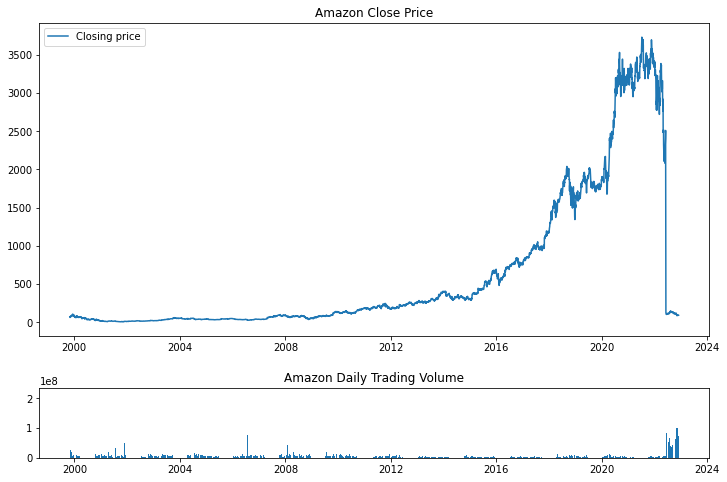

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df2['timestamp'], df2['close'], label = 'Closing price')
plt.title('Amazon Close Price')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df2["timestamp"], df2["volume"])
plt.title('Amazon Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

In [ ]:
import requests
import json
import requests

url = "https://latest-news1.p.rapidapi.com/"

payload = json.dumps({"domains": "","topic":"business","q":"amazon","qInTitle": "", "content":"", "page":"", "author_only":""})
headers = {
	"content-type": "application/json",
	"X-RapidAPI-Key": "262ee630d7msh268e0e2f0d067ebp1fa3e9jsn1cf36e1ab669",
	"X-RapidAPI-Host": "latest-news1.p.rapidapi.com"
}

response = requests.request("POST", url, data=payload, headers=headers)
    

In [ ]:
response.json().keys()

dict_keys(['Article', 'status', 'totalResults'])

In [ ]:
response_dict=response.json()

In [ ]:
# after paginating through results
print("Total results found: ", response_dict["totalResults"])
#clean_response_list = clean_response_list + response_dict["Article"]
#len(clean_response_list)

Total results found:  125


In [ ]:
import pandas as pd

In [ ]:
dft2=pd.DataFrame(columns=['author', 'content', 'description', 'publishedAt', 'source_name', 'source_url', 'title', 'url','urlToImage'])

In [ ]:
dft2

,author,content,description,publishedAt,source_name,source_url,title,url,urlToImage


In [ ]:
response_dict["totalResults"]

125

In [ ]:
for i in range(125,response_dict["totalResults"]+125):
  temp=[]
  for v in response_dict['Article'][i-125].values():
    temp.append(v)
  dft2.loc[i]=temp  

In [ ]:
dft2

,author,content,description,publishedAt,source_name,source_url,title,url,urlToImage
125,[],Follow Us Cyber Monday Deals Lure In US Consu...,Profit margins are expected to be tight for re...,2022-11-29,VOA,voanews.com,Cyber Monday Deals Lure In US Consumers amid H...,https://www.voanews.com/a/cyber-monday-deals-l...,https://gdb.voanews.com/09410000-0a00-0242-381...
126,"[""Cond\u00e9 Nast""]",All products featured on GQ are independently...,"If you're after a brighter smile, the Crest wh...",2022-11-29,GQ,gq.com,Crest White Strips Cyber Monday Deal 2022: The...,https://www.gq.com/story/crest-whitestrips-cyb...,https://media.gq.com/photos/637f935c01d821a83c...
127,[],Amazon: Why AWS Is Worth $60 Summary I believ...,I believe Amazon's most important value driver...,2022-11-29,SeekingAlpha,seekingalpha.com,Amazon Stock: Why AWS Is Worth $60 (NASDAQ:AMZ...,https://seekingalpha.com/article/4560922-amazo...,https://static.seekingalpha.com/cdn/s3/uploads...
128,[],An uptick in like-new models of sought-after ...,Crypto bros appear to be offloading their fanc...,2022-11-29,New York Post,nypost.com,"Crypto bros offloading G-Wagons, luxury cars a...",https://nypost.com/2022/11/28/crypto-bros-offl...,https://nypost.com/wp-content/uploads/sites/2/...
129,"[""Dade Hayes""]",Apple stock fell 3% today as it was hit by tw...,Apple stock fell 3% as China protests threaten...,2022-11-29,Deadline,deadline.com,Apple Stock Loses Ground As China Covid Protes...,https://deadline.com/2022/11/apple-stock-china...,https://deadline.com/wp-content/uploads/2022/0...
...,...,...,...,...,...,...,...,...,...
245,"[""Sarah Doody""]","The recent wave of layoffs at tech companies,...",Tech layoffs have left many people unexpectedl...,2022-11-29,Forbes,forbes.com,Laid Off From A Tech Company? 3 Ways To Find A...,https://www.forbes.com/sites/sarahdoody/2022/1...,https://imageio.forbes.com/specials-images/ima...
246,[],"NEW YORK/SHANGHAI, Nov 29 (Reuters) - Online ...",Online shopping fatigue set in across the Unit...,2022-11-29,,nasdaq.com,ANALYSIS-Pickup in U.S. 'Cyber Week' sales bea...,https://www.nasdaq.com/articles/analysis-picku...,/sites/acquia.prod/files/2022-11-28T164306Z_1_...
247,[],LAS VEGAS: Amazon.com on Tuesday announced so...,LAS VEGAS: Amazon.com on Tuesday announced sof...,2022-11-29,CNA,channelnewsasia.com,"Amazon unveils supply-chain, cloud services dr...",https://www.channelnewsasia.com/business/amazo...,https://onecms-res.cloudinary.com/image/upload...
248,[],"BRASILIA, Nov 29 (Reuters) - Brazilian Presid...",Brazilian President-elect Luiz Inacio Lula da ...,2022-11-29,,nasdaq.com,"Brazil's Lula courts U.K., U.S. to join Amazon...",https://www.nasdaq.com/articles/brazils-lula-c...,/sites/acquia.prod/files/2022-11-29T155442Z_1_...


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:

vader = SentimentIntensityAnalyzer()

scores = dft2['title'].apply(vader.polarity_scores).tolist()


In [ ]:
scores[:5]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.3818},
 {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'compound': -0.4019},
 {'neg': 0.338, 'neu': 0.662, 'pos': 0.0, 'compound': -0.8271}]

In [ ]:
scores_df = pd.DataFrame(scores)
# join it with main dataframe
dft2 = dft2.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
dft2['date'] = pd.to_datetime(dft2.publishedAt).dt.date

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = dft2.groupby(['date']).mean()
mean_scores

,neg,neu,pos,compound
date,,,,
2022-11-29,NaN,NaN,NaN,NaN


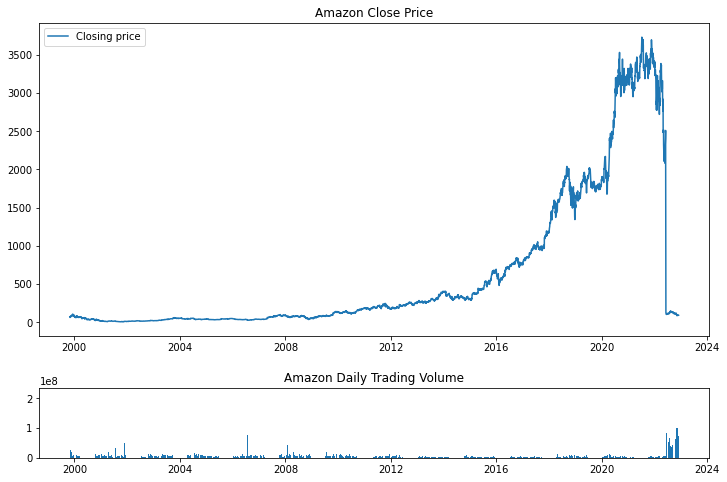

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 6]

mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound').transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

# Plotting a subset of amazon stock price for 7 days
# code block 1.2 (Cont.)

# Plotting stock and volume

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df2['timestamp'], df2['close'], label = 'Closing price')
plt.title('Amazon Close Price')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df2["timestamp"], df2["volume"])
plt.title('Amazon Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)